In [8]:
using PyPlot
using CSV
using DataFrames

In [159]:
initial = CSV.read("/Users/mmbell/Development/scythe/RL_slab_output/gridded_out_900.0.csv", DataFrame, header=1)
output = CSV.read("/Users/mmbell/Development/scythe/SWslab_test/gridded_out_900.0.csv", DataFrame, header=1)

,r,l,x,y,v,wb,vb,ub
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0,0.0,0.0,0.0,-1.11022e-16,0.00481875,-3.14759e-33,-1.98988e-31
2,0.0,0.0104546,0.0,0.0,-1.11022e-16,0.00481875,-3.20932e-33,-1.98509e-31
3,0.0,0.0209091,0.0,0.0,-1.11022e-16,0.00481875,-3.25891e-33,-1.98006e-31
4,0.0,0.0313637,0.0,0.0,-1.11022e-16,0.00481875,-3.29654e-33,-1.9748e-31
5,0.0,0.0418182,0.0,0.0,-1.11022e-16,0.00481875,-3.32265e-33,-1.9693e-31
6,0.0,0.0522728,0.0,0.0,-1.11022e-16,0.00481875,-3.33785e-33,-1.96356e-31
7,0.0,0.0627273,0.0,0.0,-1.11022e-16,0.00481875,-3.343e-33,-1.95759e-31
8,0.0,0.0731819,0.0,0.0,-1.11022e-16,0.00481875,-3.33913e-33,-1.95139e-31
9,0.0,0.0836364,0.0,0.0,-1.11022e-16,0.00481875,-3.32745e-33,-1.94495e-31


In [160]:
radius = reshape(output.r,601,100)[1,:]
lambda = reshape(output.l,601,100)[:,1]
ur = reshape(output.u_r,601,100)'
ul = reshape(output.u_l,601,100)'
v = reshape(output.v,601,100)'
ub = reshape(output.ub,601,100)'
vb = reshape(output.vb,601,100)'
wb = reshape(output.wb,601,100)'
hr = reshape(output.h_r,601,100)'
h = reshape(output.h,601,100)'
u = reshape(output.u,601,100)'

100×601 adjoint(::Matrix{Float64}) with eltype Float64:
 -1.75362e-22  -1.75362e-22  -1.75362e-22  …  -1.75362e-22  -1.75362e-22
 -6.26661e-7   -6.26661e-7   -6.26661e-7      -6.26661e-7   -6.26661e-7
 -3.61367e-6   -3.61367e-6   -3.61367e-6      -3.61367e-6   -3.61367e-6
 -2.18467e-6   -2.18467e-6   -2.18467e-6      -2.18467e-6   -2.18467e-6
 -1.89967e-6   -1.89967e-6   -1.89967e-6      -1.89967e-6   -1.89967e-6
 -2.10804e-6   -2.10804e-6   -2.10804e-6   …  -2.10804e-6   -2.10804e-6
 -1.22951e-6   -1.22951e-6   -1.22951e-6      -1.22951e-6   -1.22951e-6
 -1.92157e-7   -1.92157e-7   -1.92157e-7      -1.92157e-7   -1.92157e-7
  4.16561e-7    4.16561e-7    4.16561e-7       4.16561e-7    4.16561e-7
  2.671e-6      2.671e-6      2.671e-6         2.671e-6      2.671e-6
  4.64692e-6    4.64692e-6    4.64692e-6   …   4.64692e-6    4.64692e-6
  3.45837e-6    3.45837e-6    3.45837e-6       3.45837e-6    3.45837e-6
  1.07116e-5    1.07116e-5    1.07116e-5       1.07116e-5    1.07116e-5
  ⋮      

In [161]:
u0 = reshape(initial.ub,601,100)'
v0 = reshape(initial.vb,601,100)'
w0 = reshape(initial.wb,601,100)'
vg0 = reshape(initial.vgr,601,100)'
#h0 = reshape(initial.h,601,100)'
#hr0 = reshape(initial.h_r,601,100)'

100×601 adjoint(::Matrix{Float64}) with eltype Float64:
  5.27867e-16   5.28786e-16   5.29706e-16  …   5.25931e-16   5.26925e-16
  3.0002        3.0002        3.0002           3.0002        3.0002
  5.99863       5.99863       5.99863          5.99863       5.99863
  8.99936       8.99936       8.99936          8.99936       8.99936
 12.0035       12.0035       12.0035          12.0035       12.0035
 15.0038       15.0038       15.0038       …  15.0038       15.0038
 17.9938       17.9938       17.9938          17.9938       17.9938
 20.9856       20.9856       20.9856          20.9856       20.9856
 24.0033       24.0033       24.0033          24.0033       24.0033
 27.0393       27.0393       27.0393          27.0393       27.0393
 30.0309       30.0309       30.0309       …  30.0309       30.0309
 32.9343       32.9343       32.9343          32.9343       32.9343
 35.8421       35.8421       35.8421          35.8421       35.8421
  ⋮                                        ⋱         

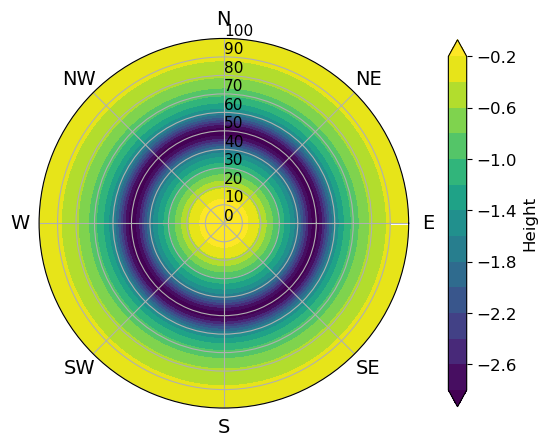

sys:1: UserWarning: FixedFormatter should only be used together with FixedLocator


In [162]:
ax = plt.subplot(111, projection="polar");
plt.contourf(lambda, radius, ub, levels=(16), extend="both");
cb = plt.colorbar(fraction=0.037, pad=0.08);
cb.set_label("Height", size=12)
cb.ax.tick_params(labelsize=12)
ax.set_rlabel_position(90)
ax.set_rticks(0:10000:100000)
ax.set_yticklabels(0:10:100, fontsize=11)
ax.set_xticklabels(["E", "NE", "N", "NW", "W", "SW", "S", "SE"], fontsize=14)
ax.set_rmax(100000)
plt.savefig("shallow_water_test.png")

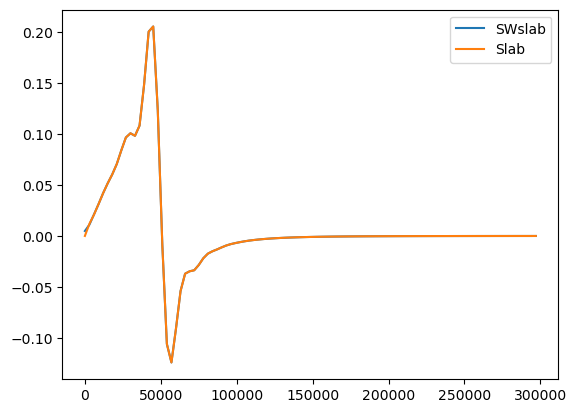

PyObject <matplotlib.legend.Legend object at 0x167a42520>

In [165]:
ax = plt.subplot(111);
plt.plot(radius,wb[:,1],label="SWslab")
plt.plot(radius,w0[:,1],label="Slab")
plt.legend()